## Plan of Action


1.   Load **IMDb Movie Reviews dataset (50,000 reviews)**
2.   **Pre-process dataset** by removing special characters, numbers, etc. from user reviews + convert **sentiment labels** positive & negative to numbers 1 & 0, respectively
3.   **Import GloVe Word Embedding** to build Embedding Dictionary + Use this to build Embedding Matrix for our Corpus
4. Model Training using **Deep Learning in Keras** for separate: **Simple Neural Net, CNN and LSTM Models** and analyse model performance and results
4. Last, perform **predictions on real IMDb movie reviews**

## Setting the environment

In [1]:
# # Mounting google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# # Setting toolkit folder as working directory

# %cd /content/drive/My Drive/Project8_SentimentAnalysis_with_NeuralNetwork
# ! ls

In [3]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf

In [4]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [5]:
from keras_preprocessing.sequence import pad_sequences

## Loading dataset

In [6]:
# Importing IMDb Movie Reviews dataset

movie_reviews = pd.read_csv("hello.csv")

# dataset source: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [7]:
# Dataset exploration

movie_reviews.shape

(50000, 2)

In [8]:
import pandas as pd

# Assuming df is your dataset with the original column names
# Replace 'original_column_name' and 'new_column_name' with your actual column names
movie_reviews.rename(columns={'review': 'text'}, inplace=True)

# Display the updated dataset
print(movie_reviews)
movie_reviews.to_csv("hello.csv",index=False)

                                                    text sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [9]:
movie_reviews.head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# Checking for missing values

movie_reviews.isnull().values.any()

False

In [11]:
# Let's observe distribution of positive / negative sentiments in dataset

# import seaborn as sns
# sns.countplot(x='sentiment', data=movie_reviews)

## Data Preprocessing

In [12]:
movie_reviews["text"][2]

# You can see that our text contains punctuations, brackets, HTML tags and numbers 
# We will preprocess this text in the next section

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [13]:
# import b2_preprocessing_function
from b2_preprocessing_function import CustomPreprocess

In [66]:
custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'best days life '

In [67]:
import re
import nltk
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)
    

class CustomPreprocess():
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()
        
        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        
        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
        
        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)
        
        return sentence

In [68]:
# TAG_RE = re.compile(r'<[^>]+>')

# def remove_tags(text):
#     '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

#     return TAG_RE.sub('', text)

In [69]:
# import nltk
# nltk.download('stopwords')

In [70]:
# def preprocess_text(sen):
#     '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
#     in lowercase'''
    
#     sentence = sen.lower()

#     # Remove html tags
#     sentence = remove_tags(sentence)

#     # Remove punctuations and numbers
#     sentence = re.sub('[^a-zA-Z]', ' ', sentence)

#     # Single character removal
#     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

#     # Remove multiple spaces
#     sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

#     # Remove Stopwords
#     pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
#     sentence = pattern.sub('', sentence)

#     return sentence

In [71]:
import pandas as pd

# Assuming movie_reviews is your DataFrame
# Load data from CSV file using pd.read_csv
movie_reviews = pd.read_csv('hello.csv')
import pandas as pd

# Assuming df is your dataset with the original column names
# Replace 'original_column_name' and 'new_column_name' with your actual column names
# movie_reviews.rename(columns={'review': 'text'}, inplace=True)

# Check for missing values
print(movie_reviews.isnull().sum())

# Drop rows with missing values
movie_reviews = movie_reviews.dropna()

# Now proceed with your preprocessing
X = []
sentences = list(movie_reviews['text'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

# X = []
# sentences = list(movie_reviews['text'])
# for sen in sentences:
#     X.append(custom.preprocess_text(sen))

text         0
sentiment    0
dtype: int64


In [72]:
# Sample cleaned up movie review 

X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [73]:
# Converting sentiment labels to 0 & 1

y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

## Preparing embedding layer

Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then **used as the first layer for the deep learning models in Keras**.

In [75]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [76]:
import io
import json

In [77]:
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [78]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

92394

In [79]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [80]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [81]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [82]:
embedding_matrix.shape

(92394, 100)

# Model Training with:

## Simple Neural Network

In [83]:
# Neural Network architecture
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))


In [84]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 9249401 (35.28 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________
None


In [85]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 2s 5ms/step - loss: 0.5569 - acc: 0.7162 - val_loss: 0.5049 - val_acc: 0.7581
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4486 - acc: 0.7944 - val_loss: 0.4923 - val_acc: 0.7690
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4111 - acc: 0.8177 - val_loss: 0.4991 - val_acc: 0.7648
Epoch 4/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3904 - acc: 0.8283 - val_loss: 0.5139 - val_acc: 0.7602
Epoch 5/6
250/250 [==============================] - 1s 4ms/step - loss: 0.3751 - acc: 0.8363 - val_loss: 0.5217 - val_acc: 0.7585
Epoch 6/6
250/250 [==============================] - 1s 4ms/step - loss: 0.3622 - acc: 0.8431 - val_loss: 0.5374 - val_acc: 0.7526


In [86]:
# # Model training

# snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

In [87]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.5682 - acc: 0.7441


In [88]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5681877732276917
Test Accuracy: 0.7440999746322632


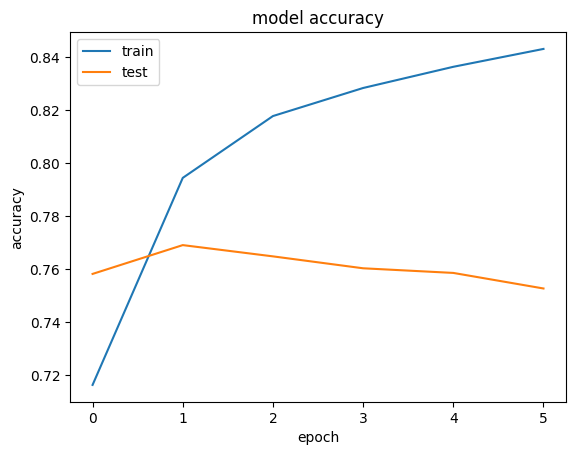

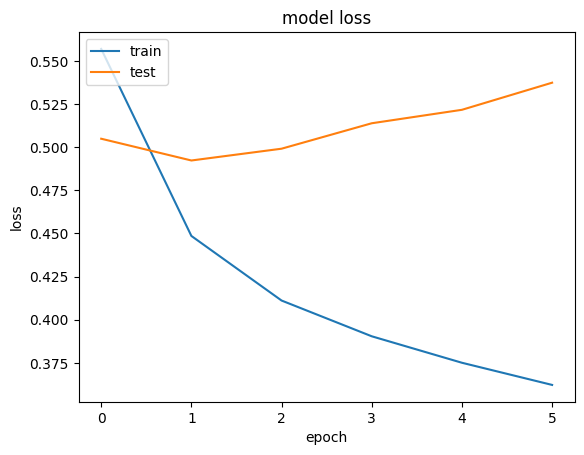

In [89]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Convolutional Neural Network

In [90]:
from keras.layers import Conv1D

In [91]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [92]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9303657 (35.49 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________
None


In [93]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 8s 31ms/step - loss: 0.4654 - acc: 0.7776 - val_loss: 0.3738 - val_acc: 0.8369
Epoch 2/6
250/250 [==============================] - 8s 30ms/step - loss: 0.3335 - acc: 0.8573 - val_loss: 0.3454 - val_acc: 0.8500
Epoch 3/6
250/250 [==============================] - 8s 31ms/step - loss: 0.2784 - acc: 0.8891 - val_loss: 0.3395 - val_acc: 0.8504
Epoch 4/6
250/250 [==============================] - 8s 30ms/step - loss: 0.2351 - acc: 0.9132 - val_loss: 0.3323 - val_acc: 0.8544
Epoch 5/6
250/250 [==============================] - 8s 31ms/step - loss: 0.1914 - acc: 0.9381 - val_loss: 0.3382 - val_acc: 0.8516
Epoch 6/6
250/250 [==============================] - 8s 30ms/step - loss: 0.1574 - acc: 0.9546 - val_loss: 0.3348 - val_acc: 0.8570


In [94]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3353 - acc: 0.8568


In [95]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.33525046706199646
Test Accuracy: 0.8568000197410583


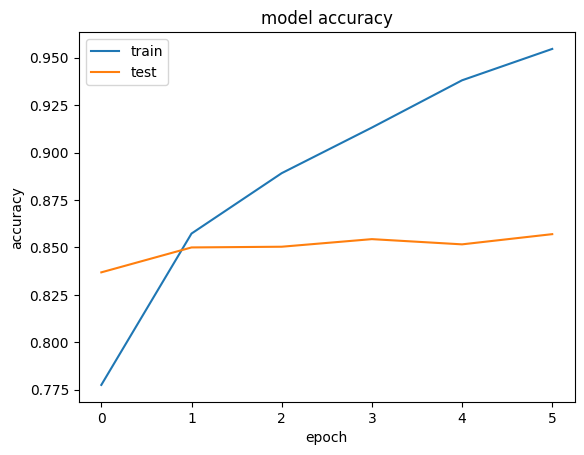

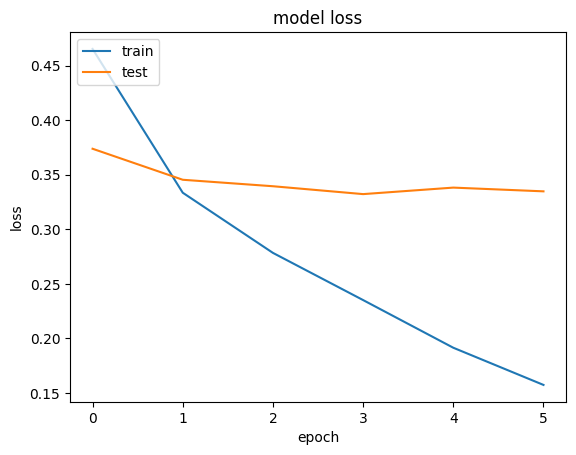

In [96]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## Recurrent Neural Network (LSTM)

In [97]:
from keras.layers import LSTM

In [98]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [99]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9356777 (35.69 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________
None


In [100]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 39s 147ms/step - loss: 0.5315 - acc: 0.7344 - val_loss: 0.4238 - val_acc: 0.8139
Epoch 2/6
250/250 [==============================] - 36s 142ms/step - loss: 0.4256 - acc: 0.8110 - val_loss: 0.4150 - val_acc: 0.7981
Epoch 3/6
250/250 [==============================] - 36s 142ms/step - loss: 0.3757 - acc: 0.8373 - val_loss: 0.3506 - val_acc: 0.8522
Epoch 4/6
250/250 [==============================] - 36s 143ms/step - loss: 0.3436 - acc: 0.8534 - val_loss: 0.3436 - val_acc: 0.8534
Epoch 5/6
250/250 [==============================] - 36s 144ms/step - loss: 0.3214 - acc: 0.8644 - val_loss: 0.3184 - val_acc: 0.8648
Epoch 6/6
250/250 [==============================] - 36s 145ms/step - loss: 0.3028 - acc: 0.8753 - val_loss: 0.3192 - val_acc: 0.8633


In [101]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 7s 22ms/step - loss: 0.3166 - acc: 0.8632


In [102]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3165968358516693
Test Accuracy: 0.8632000088691711


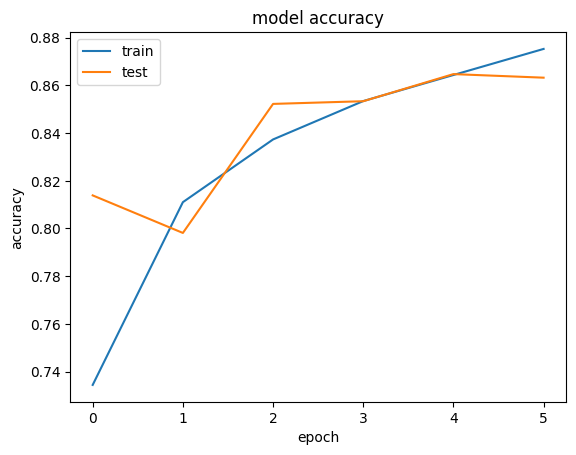

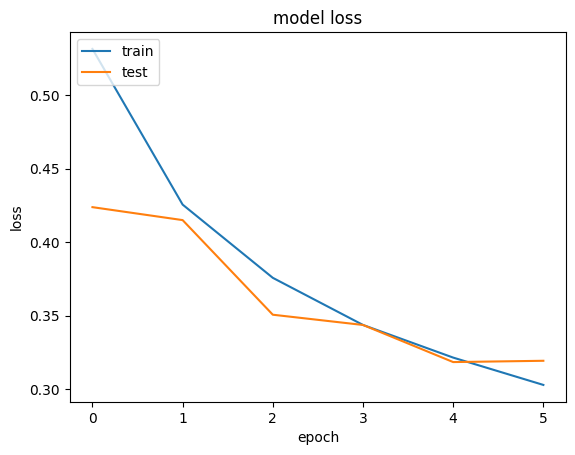

In [103]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [111]:
# lstm_model.save('full_model.h5')
lstm_model.save(f"./full_model_{round(score[1], 3)}.h5", save_format='h5')


In [112]:
pwd

'C:\\Users\\strop\\sentiment-analysis-with-deep-neural-networks-main'

In [113]:
# Load previously trained LSTM Model

from keras.models import load_model

model_path ='full_model.h5'
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9356777 (35.69 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


In [117]:
sample = pd.read_csv("predict.csv")

sample.head()

,Text
0,This tutorial was so helpful! Thanks a bunch
1,"Ugh, I've been struggling with this for hours...."
2,Your energy is contagious! Loved every minute ...
3,Why does this always happen to me?
4,"Wow, this is a game-changer! Can't believe I d..."


In [118]:
# Preprocess  text with earlier defined preprocess_text function

unseen_text = sample['Text']

unseen_processed = []
for text in unseen_text:
  text = custom.preprocess_text(text)
  unseen_processed.append(text)

In [119]:
unseen_processed

['tutorial helpful thanks bunch',
 'ugh struggling hours cool ',
 'energy contagious loved every minute video',
 'always happen ',
 'wow game changer believe know sooner ',
 'stop watching videos make learning much fun',
 'music background distracting please consider changing ',
 'tried recipe turned amazing thanks sharing ',
 'ads way long losing interest ',
 'accent soothing could listen day ',
 'topic confusing make follow video please ',
 'never seen someone explain complex concepts clearly great job ',
 'many dislikes content gold',
 'enthusiasm infectious keep fantastic work',
 'unsubscribing content become repetitive ',
 'exactly needed hear today thank motivation',
 'believe people actually believe nonsense ',
 'editing video top notch kudos editing team',
 'views deserves way recognition ',
 'watched video multiple times still get ',
 'smile infectious instantly brightened day ',
 'please collab another youtuber would epic',
 'life saver saved hours frustration ',
 'miss old c

In [120]:
from keras_preprocessing.text import tokenizer_from_json


In [121]:
# Loading
with open('b3_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [122]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_processed)

In [123]:
unseen_tokenized

[[52373, 5409, 1036, 618],
 [5463, 2696, 478, 455],
 [1535, 16621, 304, 72, 643, 252],
 [106, 432],
 [1113, 327, 33950, 146, 39, 5365],
 [406, 54, 2993, 21, 2583, 13, 134],
 [100, 782, 3699, 457, 1028, 2313],
 [598, 8736, 518, 367, 1036, 5104],
 [7141, 23, 90, 2112, 475],
 [1043, 17214, 22, 1465, 141],
 [2757, 1287, 21, 666, 252, 457],
 [34, 30, 170, 1072, 1143, 5073, 562, 17, 181],
 [32, 17551, 1294, 1470],
 [4518, 9957, 272, 678, 64],
 [1294, 310, 3360],
 [497, 741, 700, 366, 1190, 3133],
 [146, 16, 63, 146, 1684],
 [642, 252, 221, 2251, 3273, 642, 567],
 [2715, 839, 23, 3841],
 [171, 252, 2393, 104, 47, 15],
 [1728, 9957, 2978, 39788, 141],
 [457, 62, 8, 1376],
 [36, 55557, 1886, 478, 4283],
 [549, 61, 1294, 1014, 2993, 115],
 [21, 152, 195, 619, 283, 150],
 [252, 1013, 1909, 219, 205, 2347],
 [419, 33484, 284, 91612, 90, 141],
 [3113, 1032, 272, 998, 64],
 [345, 2993, 15371, 249, 1006],
 [629, 540],
 [1535, 13, 27],
 [34, 4044, 367, 252],
 [20, 299, 137, 332, 109],
 [1375, 1793, 20

In [124]:
# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [125]:
unseen_padded

array([[52373,  5409,  1036, ...,     0,     0,     0],
       [ 5463,  2696,   478, ...,     0,     0,     0],
       [ 1535, 16621,   304, ...,     0,     0,     0],
       ...,
       [17551,   127,    16, ...,     0,     0,     0],
       [  252,    20,   141, ...,     0,     0,     0],
       [ 2993,    51,   237, ...,     0,     0,     0]])

In [126]:
# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = pretrained_lstm_model.predict(unseen_padded)

unseen_sentiments

2/2 [==============================] - 1s 26ms/step


array([[0.66656995],
       [0.30776197],
       [0.7500851 ],
       [0.61019933],
       [0.58858967],
       [0.49132755],
       [0.4786671 ],
       [0.9068841 ],
       [0.3225004 ],
       [0.6789592 ],
       [0.43440256],
       [0.6877318 ],
       [0.7388242 ],
       [0.87705475],
       [0.29435697],
       [0.7162149 ],
       [0.43803477],
       [0.5291389 ],
       [0.7610486 ],
       [0.693717  ],
       [0.8389479 ],
       [0.5593406 ],
       [0.3491917 ],
       [0.82166344],
       [0.55830705],
       [0.27018443],
       [0.8816256 ],
       [0.8425545 ],
       [0.92963314],
       [0.10900496],
       [0.5214751 ],
       [0.8950719 ],
       [0.5803042 ],
       [0.69140697],
       [0.46142444],
       [0.64616704],
       [0.54429835],
       [0.23385362],
       [0.85637826],
       [0.82021743],
       [0.69220996],
       [0.80700964],
       [0.23900773],
       [0.6138513 ],
       [0.5701353 ],
       [0.6027807 ],
       [0.85345775]], dtype=float3

In [129]:
# Writing model output file back to Google Drive

sample['Predicted Sentiments'] = np.round(unseen_sentiments*10,1)

df_prediction_sentiments = pd.DataFrame(sample['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_text = pd.DataFrame(sample['Text'], columns = ['Text'])


dfx=pd.concat([df_text, df_prediction_sentiments], axis=1)

dfx.to_csv("Predictions.csv", sep=',', encoding='UTF-8')

dfx.head(6)

,Text,Predicted Sentiments
0,This tutorial was so helpful! Thanks a bunch,6.7
1,"Ugh, I've been struggling with this for hours....",3.1
2,Your energy is contagious! Loved every minute ...,7.5
3,Why does this always happen to me?,6.1
4,"Wow, this is a game-changer! Can't believe I d...",5.9
5,I can't stop watching your videos. You make le...,4.9


In [130]:
unseen_sentiments


array([[0.66656995],
       [0.30776197],
       [0.7500851 ],
       [0.61019933],
       [0.58858967],
       [0.49132755],
       [0.4786671 ],
       [0.9068841 ],
       [0.3225004 ],
       [0.6789592 ],
       [0.43440256],
       [0.6877318 ],
       [0.7388242 ],
       [0.87705475],
       [0.29435697],
       [0.7162149 ],
       [0.43803477],
       [0.5291389 ],
       [0.7610486 ],
       [0.693717  ],
       [0.8389479 ],
       [0.5593406 ],
       [0.3491917 ],
       [0.82166344],
       [0.55830705],
       [0.27018443],
       [0.8816256 ],
       [0.8425545 ],
       [0.92963314],
       [0.10900496],
       [0.5214751 ],
       [0.8950719 ],
       [0.5803042 ],
       [0.69140697],
       [0.46142444],
       [0.64616704],
       [0.54429835],
       [0.23385362],
       [0.85637826],
       [0.82021743],
       [0.69220996],
       [0.80700964],
       [0.23900773],
       [0.6138513 ],
       [0.5701353 ],
       [0.6027807 ],
       [0.85345775]], dtype=float3

In [149]:
unseen_sentiments[18][0]


0.7610486

In [150]:
prediction_text= f"Positive Review with probable IMDb rating as: {np.round(unseen_sentiments[18][0]*10,1)}"


In [151]:
prediction_text

'Positive Review with probable IMDb rating as: 7.6'

In [152]:
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import tokenizer_from_json

# file_path = 'full_model.h5'

# if os.path.exists(file_path):
#     print("Model has been successfully saved.")
# else:
#     print("Model saving failed.")

# # Load the saved model
# loaded_model = tf.keras.models.load_model('full_model.h5')

# # Example text for prediction
# text = "I love you. "
# preprocessor = CustomPreprocess()
# # Assuming preprocess_text is your text preprocessing function
# processed_text = preprocessor.preprocess_text(text)

# # Load the saved tokenizer from the JSON file
# with open('b3_tokenizer.json', 'r') as f:
#     tokenizer_config = json.load(f)
    
# # Create a new tokenizer instance and set its configuration
# tokenizer = tokenizer_from_json(tokenizer_config)

# # Tokenize the text
# tokenized_text = tokenizer.texts_to_sequences([processed_text])

# # Ensure that the sequence length matches the model's expectation
# # If necessary, pad or truncate the sequence to match the expected length
# # For example, if the model expects sequences of length 1146:
# expected_sequence_length = 1146
# input_data = pad_sequences(tokenized_text, maxlen=expected_sequence_length, padding='post', truncating='post')

# # Make predictions
# predictions = loaded_model.predict(input_data)

# # Interpret predictions (binary classification example)
# sentiment_label = "Positive" if predictions[0][0] > 0.5 else "Negative"
# print(f"Predicted Sentiment: {sentiment_label}")

In [ ]:
# Saving the model as a h5 file for possible use later

# lstm_model.save(f"./c1_lstm_model_acc_{round(score[1], 3)}.h5", save_format='h5')

# Making Predictions on Live IMDb data

In [ ]:
# pwd # lists files in working directory

In [ ]:
# # Load previously trained LSTM Model

# from keras.models import load_model

# model_path ='c1_lstm_model_acc_0.864.h5'
# pretrained_lstm_model = load_model(model_path)

# # summarize model.
# pretrained_lstm_model.summary()

In [ ]:
# # Load sample IMDb reviews csv, having ~6 movie reviews, along with their IMDb rating

# sample_reviews = pd.read_csv("a3_IMDb_Unseen_Reviews.csv")

# sample_reviews.head(6)

In [ ]:
# # Preprocess review text with earlier defined preprocess_text function

# unseen_reviews = sample_reviews['Review Text']

# unseen_processed = []
# for review in unseen_reviews:
#   review = custom.preprocess_text(review)
#   unseen_processed.append(review)

In [ ]:
# unseen_processed

In [ ]:
# from keras_preprocessing.text import tokenizer_from_json

In [ ]:
# # Loading
# with open('b3_tokenizer.json') as f:
#     data = json.load(f)
#     loaded_tokenizer = tokenizer_from_json(data)

In [ ]:
# # Tokenising instance with earlier trained tokeniser
# unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_processed)

In [ ]:
# unseen_tokenized

In [ ]:
# # Pooling instance to have maxlength of 100 tokens
# unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [ ]:
# unseen_padded

In [ ]:
# # Passing tokenised instance to the LSTM model for predictions
# unseen_sentiments = pretrained_lstm_model.predict(unseen_padded)

# unseen_sentiments

In [ ]:
# # Writing model output file back to Google Drive

# sample_reviews['Predicted Sentiments'] = np.round(unseen_sentiments*10,1)

# df_prediction_sentiments = pd.DataFrame(sample_reviews['Predicted Sentiments'], columns = ['Predicted Sentiments'])
# df_movie                 = pd.DataFrame(sample_reviews['Movie'], columns = ['Movie'])
# df_review_text           = pd.DataFrame(sample_reviews['Review Text'], columns = ['Review Text'])
# df_imdb_rating           = pd.DataFrame(sample_reviews['IMDb Rating'], columns = ['IMDb Rating'])


# dfx=pd.concat([df_movie, df_review_text, df_imdb_rating, df_prediction_sentiments], axis=1)

# dfx.to_csv("c2_IMDb_Unseen_Predictions.csv", sep=',', encoding='UTF-8')

# dfx.head(6)

In [ ]:
# unseen_sentiments

In [ ]:
# unseen_sentiments[0][0]

In [ ]:
# prediction_text= f"Positive Review with probable IMDb rating as: {np.round(unseen_sentiments[0][0]*10,1)}"

In [ ]:
# prediction_text